# 72hr MAC - Neap tide


### This script can be used to find Maximum Allowable Concentration (MAC)

To assess the long-term risks from Azamethiphos, the full treatment regime is modelled.  
Maximum concentration in the domain should not exceed 100 ng/l (maximum allowable concentration - MAC)

In [2]:
import xarray as xr
import tfv.xarray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FixedLocator

User inputs

In [3]:
#Read the tuflowfv output
file_path_Neap_SC01 = r"X:\Scratch1\aqua_dis_3hr_neap_001.nc"

Read in Files

In [4]:
# Open the dataset in xarray array
fv_Neap_SC01 = xr.open_dataset(file_path_Neap_SC01, decode_times=False).tfv
#fv_Neap_SC01

In [5]:
# Calculate maximum tracer concentration at each timestep
max_concentration = fv_Neap_SC01.get_sheet('TRACE_1').max(dim='NumCells2D')

...extracting sheet data: 100%|████████████████████████████████████████████████████| 1225/1225 [01:27<00:00, 14.07it/s]


In [6]:
print(max_concentration.head())


<xarray.Dataset>
Dimensions:      (Time: 5, MaxNumCellVert: 4, NumCells3D: 5, NumVert2D: 5,
                  NumLayerFaces3D: 5)
Coordinates:
  * Time         (Time) datetime64[ns] 2022-10-13 ... 2022-10-13T01:19:59.999...
Dimensions without coordinates: MaxNumCellVert, NumCells3D, NumVert2D,
                                NumLayerFaces3D
Data variables: (12/16)
    ResTime      (Time) float64 2.874e+05 2.874e+05 ... 2.874e+05 2.874e+05
    cell_Nvert   int32 4
    cell_node    (MaxNumCellVert) int32 19075 19075 19075 12460
    NL           int32 27
    idx2         (NumCells3D) int32 1 1 1 1 1
    idx3         int32 560512
    ...           ...
    node_X       (NumVert2D) float32 -4.973 -4.972 -4.972 -4.923 -4.923
    node_Y       (NumVert2D) float32 58.26 58.26 58.25 58.26 58.26
    node_Zb      (NumVert2D) float32 -12.93 -12.93 -12.8 -1.0 -1.0
    layerface_Z  (Time, NumLayerFaces3D) float32 0.8186 -0.1451 ... -3.202
    stat         (Time) int32 -1 -1 -1 -1 -1
    TRACE_1      (

In [7]:
# Specify start,end time and final treatment time
Start_Time = pd.to_datetime('2022-10-13 00:00:00', format='%Y-%m-%d %H:%M:%S')
End_Time = pd.to_datetime('2022-10-30 00:00:00', format='%Y-%m-%d %H:%M:%S')
final_treatment = pd.to_datetime('2022-10-19 04:00:00', format='%Y-%m-%d %H:%M:%S')

Switch on the below command incase you want to convert concontrations to micrograms.

In [8]:
# Convert the max concentration values to micrograms per liter
#max_concentration = max_concentration * 0.001


In [9]:
# Extract the 'Time' and 'TRACE_1' variables from the xarray Dataset
time_values = max_concentration['Time'].values
tracer_values = max_concentration['TRACE_1'].values

# Create a DataFrame with the 'Time' and 'TRACE_1' columns
df_max_concentration = pd.DataFrame({
    'Time': time_values,
    'Max Tracer 1 Concentration': tracer_values
})

Save the data frame as a csv

In [13]:
# Save the DataFrame to a CSV file
df_max_concentration.to_csv('../data/aqua_72hr_mac_neap.csv', index=True)

Calculate max of max concnetration

In [14]:
# Your existing code to create the DataFrame
df_max_concentration = pd.DataFrame({
    'Time': time_values,
    'Max Tracer 1 Concentration': tracer_values
})

# Find the maximum value and its corresponding time
max_concentration = df_max_concentration['Max Tracer 1 Concentration'].max()
time_at_max_concentration = df_max_concentration.loc[df_max_concentration['Max Tracer 1 Concentration'].idxmax(), 'Time']

# Calculate the mean of 'Max Tracer 1 Concentration' column
mean_concentration = df_max_concentration['Max Tracer 1 Concentration'].mean()

# Save the DataFrame to a CSV file
df_max_concentration.to_csv('max_concentration.csv', index=False)

# Print the DataFrame to view the data
print(df_max_concentration)

# Print the max value, time at max, and mean value
print(f"Maximum Tracer 1 Concentration: {max_concentration}")
print(f"Time at Maximum Tracer 1 Concentration: {time_at_max_concentration}")
print(f"Mean Tracer 1 Concentration: {mean_concentration}")

                              Time  Max Tracer 1 Concentration
0    2022-10-13 00:00:00.000000000                    0.000000
1    2022-10-13 00:19:59.999998800                    0.000000
2    2022-10-13 00:40:00.000001200                    0.000000
3    2022-10-13 01:00:00.000000000                    0.000000
4    2022-10-13 01:19:59.999998800                    0.000000
...                            ...                         ...
1220 2022-10-29 22:40:00.000001200                    1.173723
1221 2022-10-29 23:00:00.000000000                    1.170670
1222 2022-10-29 23:19:59.999998800                    1.167869
1223 2022-10-29 23:40:00.000001200                    1.165333
1224 2022-10-30 00:00:00.000000000                    1.163312

[1225 rows x 2 columns]
Maximum Tracer 1 Concentration: 5659.388817497663
Time at Maximum Tracer 1 Concentration: 2022-10-16 07:19:59.999998800
Mean Tracer 1 Concentration: 114.99564058446687


Calculate concentration 72 hrs after the final treatment

In [20]:
# Find the concentration at 72 hours after the final treatment
final_treatment_datetime = pd.to_datetime('2022-10-19 04:00:00')
time_72_hours_after_treatment = final_treatment_datetime + pd.Timedelta(hours=72)

concentration_at_72_hours = df_max_concentration.loc[df_max_concentration['Time'] == time_72_hours_after_treatment, 'Max Tracer 1 Concentration'].values[0]

# EQS value
eqs_value = 100

# Calculate the concentration_at_72_hours as a percentage of the EQS
percentage_of_eqs = (concentration_at_72_hours / eqs_value) * 100

print(f"Concentration at 72 hours after the final treatment: {concentration_at_72_hours}")
print(f"Percentage of EQS at 72 hours after the final treatment: {percentage_of_eqs:.2f}%")

Concentration at 72 hours after the final treatment: 6.019799079178803
Percentage of EQS at 72 hours after the final treatment: 6.02%


In [10]:
# Print the DataFrame to view the data
print(df_max_concentration)

                              Time  Max Tracer 1 Concentration
0    2022-10-13 00:00:00.000000000                    0.000000
1    2022-10-13 00:19:59.999998800                    0.000000
2    2022-10-13 00:40:00.000001200                    0.000000
3    2022-10-13 01:00:00.000000000                    0.000000
4    2022-10-13 01:19:59.999998800                    0.000000
...                            ...                         ...
1220 2022-10-29 22:40:00.000001200                    1.173723
1221 2022-10-29 23:00:00.000000000                    1.170670
1222 2022-10-29 23:19:59.999998800                    1.167869
1223 2022-10-29 23:40:00.000001200                    1.165333
1224 2022-10-30 00:00:00.000000000                    1.163312

[1225 rows x 2 columns]


In [11]:
# Filter the DataFrame based on the specified start and end time
filtered_df = df_max_concentration[(df_max_concentration['Time'] >= Start_Time) & (df_max_concentration['Time'] <= End_Time)]

# Convert the 'Time' column to hours
filtered_df['Time'] = (filtered_df['Time'] - final_treatment) / pd.Timedelta(hours=1)

In [12]:
print(filtered_df)

            Time  Max Tracer 1 Concentration
0    -148.000000                    0.000000
1    -147.666667                    0.000000
2    -147.333333                    0.000000
3    -147.000000                    0.000000
4    -146.666667                    0.000000
...          ...                         ...
1220  258.666667                    1.173723
1221  259.000000                    1.170670
1222  259.333333                    1.167869
1223  259.666667                    1.165333
1224  260.000000                    1.163312

[1225 rows x 2 columns]


Plotting

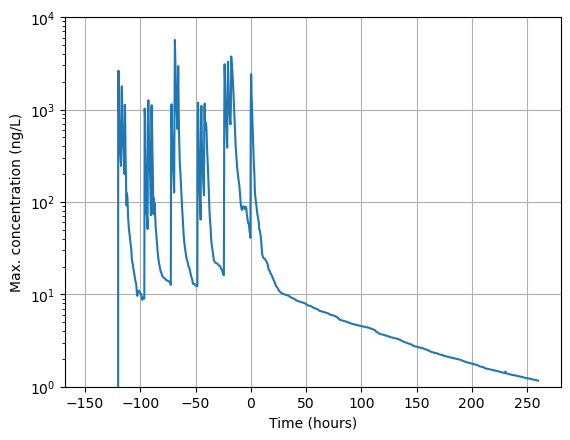

In [15]:
# Plot the time series
plt.plot(filtered_df['Time'], filtered_df['Max Tracer 1 Concentration'])

# Customize the plot
plt.xlabel('Time (hours)')
plt.ylabel('Max. concentration (ng/L)')
#plt.title(''.format(Start_Time, End_Time))
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.ylim(1e0, 1e4)  # Set y-axis limits from 10^-6 to 10^1
plt.grid(True)

# Display the plot
plt.show()


Add EQS lines for 72hr MAC

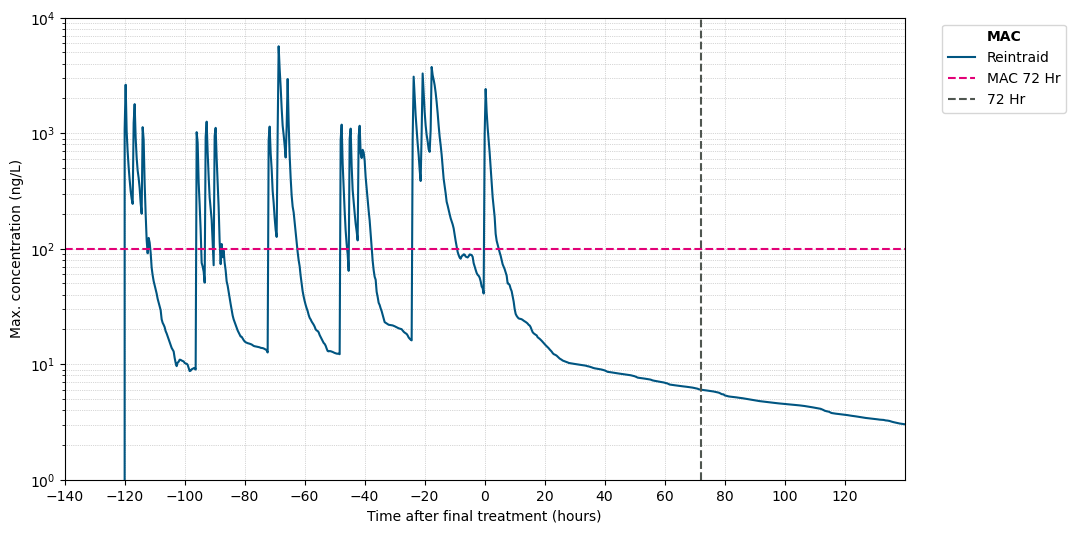

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(left=0.1, right=0.8)

# Plot the time series
plt.plot(filtered_df['Time'], filtered_df['Max Tracer 1 Concentration'], label='ABC_Farm',color='#005581')

# Customize the plot
ax.set_xlabel('Time after final treatment (hours)')
ax.set_ylabel('Max. concentration (ng/L)')
ax.set_ylim(1e0, 1e4)
ax.set_xlim(-140, 140)
ax.set_xticks(np.arange(-140, 140, 20))
ax.set_yscale('log')  # Set y-axis to logarithmic scale

# Add horizontal line
ax.hlines(y=1e2, xmin=-140, xmax=140, colors='#E20177', linestyles='dashed', label='MAC 72 Hr')

# Add vertical line
ax.vlines(x=72, ymin=1e0, ymax=1e4, colors='#4F5650', linestyles='dashed', label='72 Hr')

# Add legend
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=1, title='MAC')
plt.setp(legend.get_title(), weight='bold')

# Add minor gridlines for the logarithmic y-axis
ax.yaxis.grid(True, which='both', linestyle=':', linewidth=0.5)
ax.xaxis.grid(True, which='major', linestyle=':', linewidth=0.5)

# Save plot as PNG image with DPI of 300
fig.savefig('../figures/aqua_72hr_mac_neap.png',dpi=300)

plt.show()
